In [1]:
import pandas as pd
from feature_clustering.feature_clustering import FeatureCluster

c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:

In [2]:
data = pd.read_csv("../data/datos_income_TFM.csv")
data.head()

,X.STATE,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,...,EMPLOY1.6,EMPLOY1.7,EMPLOY1.8,X.IMPRACE.1,X.IMPRACE.2,X.IMPRACE.3,X.IMPRACE.4,X.IMPRACE.5,X.IMPRACE.6,VO_CORAZON
0,5039877,1,3,3,30,3,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,5039877,1,2,0,0,0,1,1,1,4,...,0,1,0,0,1,0,0,0,0,0
2,5039877,1,2,0,0,0,1,1,0,4,...,0,1,0,0,1,0,0,0,0,0
3,5039877,1,4,0,0,0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
4,5039877,1,3,0,0,0,1,1,0,4,...,0,1,0,1,0,0,0,0,0,0


In [3]:
target = "DIABETE4"

feature_cluster = FeatureCluster(k=8)
feature_cluster.fit(data.drop(columns=target), data[target])

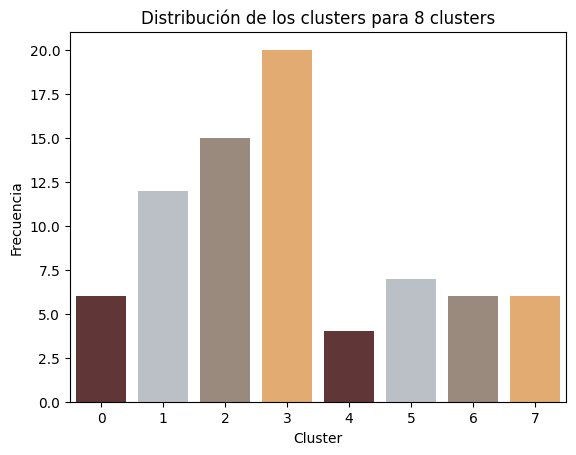

In [4]:
feature_cluster.plot()

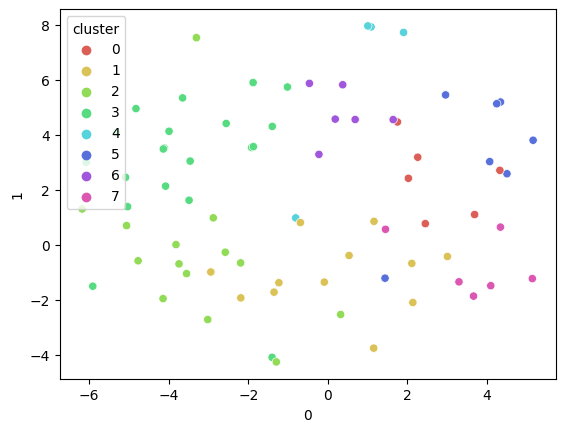

In [5]:
feature_cluster.plot(plot_type="tsne")

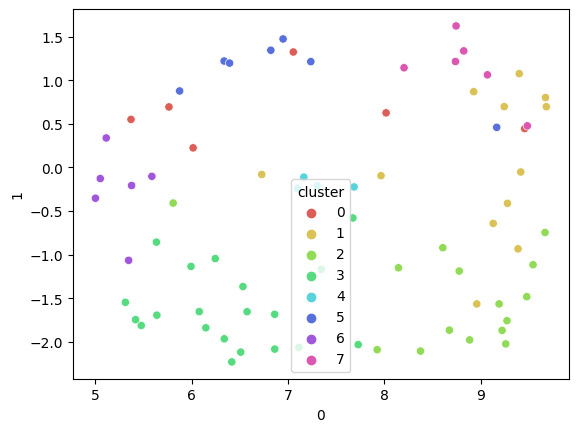

In [6]:
feature_cluster.plot(plot_type="umap")

In [7]:
feature_cluster.score()

{'Silhouette Coefficient': 0.023866815066838274,
 'Calinski-Harabasz Index': 2.1818489989981655,
 'Davies-Bouldin Index': 3.2511759986156896,
 'Dunn Index': 0.6350860721663223}

In [8]:
feature_cluster.get_feature_clusters()

{0: ['GENHLTH', 'CHILDREN', 'MAXDRNKS', 'ECIGNOW', 'MARITAL.6', 'EMPLOY1.1'],
 1: ['X.STATE',
  'MENTHLTH',
  'MEDCOST',
  'ADDEPEV3',
  'DECIDE',
  'SMOKDAY2',
  'MARITAL.4',
  'RENTHOM1.2',
  'EMPLOY1.8',
  'X.IMPRACE.2',
  'X.IMPRACE.4',
  'X.IMPRACE.6'],
 2: ['PHYSHLTH',
  'POORHLTH',
  'CVDSTRK3',
  'ASTHMA3',
  'ASTHNOW',
  'CHCCOPD2',
  'CHCKDNY2',
  'BLIND',
  'DIFFWALK',
  'DIFFDRES',
  'DIFFALON',
  'FALL12MN',
  'CIMEMLOS',
  'EMPLOY1.3',
  'EMPLOY1.5'],
 3: ['SEXVAR',
  'HLTHPLN1',
  'PERSDOC2',
  'CHECKUP1',
  'SLEPTIM1',
  'CHCSCNCR',
  'CHCOCNCR',
  'HAVARTH4',
  'DIABAGE3',
  'RMVTETH4',
  'DEAF',
  'FLUSHOT7',
  'X.AGEG5YR',
  'X.AGE80',
  'MARITAL.2',
  'MARITAL.3',
  'RENTHOM1.1',
  'EMPLOY1.7',
  'X.IMPRACE.1',
  'VO_CORAZON'],
 4: ['SMOKE100', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG'],
 5: ['WEIGHT2',
  'HEIGHT3',
  'USENOW3',
  'ALCDAY5',
  'DRNK3GE5',
  'EMPLOY1.2',
  'EMPLOY1.4'],
 6: ['EXERANY2', 'LASTDEN4', 'EDUCA', 'SEATBELT', 'X.INCOMG', 'MARITAL.1'],
 7: ['HIVRISK

In [9]:
best_features_mi = feature_cluster.select_best_features(strategy="mutual-information")

Computing cluster 0
Computing cluster 1
Computing cluster 2
Computing cluster 3
Computing cluster 4
Computing cluster 5
Computing cluster 6
Computing cluster 7


In [10]:
best_features_mi

{0: ['GENHLTH', 'EMPLOY1.1', 'MAXDRNKS'],
 1: ['RENTHOM1.2',
  'EMPLOY1.8',
  'ADDEPEV3',
  'DECIDE',
  'X.IMPRACE.2',
  'MEDCOST'],
 2: ['DIFFWALK', 'DIFFALON', 'CHCCOPD2', 'PHYSHLTH', 'ASTHNOW', 'ASTHMA3'],
 3: ['DIABAGE3', 'HAVARTH4', 'EMPLOY1.7', 'FLUSHOT7', 'SEXVAR', 'X.IMPRACE.1'],
 4: ['SMOKE100', 'LCSLAST'],
 5: ['EMPLOY1.2', 'ALCDAY5', 'WEIGHT2'],
 6: ['EXERANY2', 'MARITAL.1', 'LASTDEN4'],
 7: ['MARITAL.5', 'X.IMPRACE.5', 'EMPLOY1.6']}

In [11]:
best_features_ffs = feature_cluster.select_best_features(strategy="forward-feature-selection")

['GENHLTH']
best_auc 0.6660315861912548 auc_actual 0
['EMPLOY1.8']
best_auc 0.6670703032600866 auc_actual 0.6660315861912548
['CHCKDNY2']
best_auc 0.6704138249639982 auc_actual 0.6670703032600866
['DIABAGE3']
best_auc 0.9405450041288191 auc_actual 0.6704138249639982
['LCSLAST']
best_auc 0.9405450041288191 auc_actual 0.9405450041288191
['EMPLOY1.4']
best_auc 0.9405450041288191 auc_actual 0.9405450041288191
['MARITAL.1']
best_auc 0.9405450041288191 auc_actual 0.9405450041288191
['HIVRISK5']
best_auc 0.9405450041288191 auc_actual 0.9405450041288191
['ECIGNOW']
best_auc 0.9405763405756431 auc_actual 0.9405450041288191
['MEDCOST']
best_auc 0.9406312475585956 auc_actual 0.9405763405756431
['EMPLOY1.5']
best_auc 0.9405450041288191 auc_actual 0.9406312475585956
['X.IMPRACE.1']
best_auc 0.9405450041288191 auc_actual 0.9405450041288191
['LCSLAST']
best_auc 0.9406157157372054 auc_actual 0.9405450041288191
['EMPLOY1.4']
best_auc 0.9406370284697004 auc_actual 0.9406157157372054
['EDUCA']
best_auc 0

In [12]:
best_features_ffs

{0: ['GENHLTH', 'ECIGNOW'],
 1: ['MEDCOST', 'EMPLOY1.8'],
 2: ['CHCKDNY2', 'EMPLOY1.5'],
 3: ['DIABAGE3', 'X.IMPRACE.1'],
 4: ['LCSLAST'],
 5: ['EMPLOY1.4'],
 6: ['EDUCA', 'MARITAL.1'],
 7: ['HIVRISK5', 'RENTHOM1.3']}